**1**. (100 points)

## Pierre Gardan

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [ ]:
from IPython.display import Video

Video("forest_fire.mp4")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import numpy.ma as ma
import pandas as pd
np.random.seed(123)

In [2]:
EMPTY, TREE, BURN = 0, 1, 2

In [3]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [4]:
%%time
# Create 0 matrix
sim = np.zeros((200,200,200), dtype=int)

# We iterate through each sheet but the first one
for n in range(1,200):
    sim[n][(sim[n-1]==1) & (sim[n-1]!=2)]=np.random.choice((1,2), len(sim[n][(sim[n-1]==1) & (sim[n-1]!=2)]),
                                                           p=[0.9997, 0.0003]) # trees can start burning
    sim[n,1:-1,1:-1][sim[n-1,1:-1,1:-1]==0]=np.random.choice((0,1), len(sim[n,1:-1,1:-1][sim[n-1,1:-1,1:-1]==0]),
                                                             p=[0.97, 0.03]) # empty cells can become trees
    sim[n][sim[n-1]==2]=0 # previous burning cells become empty
    a = np.where((sim[n-1]==1)&(sim[n]==1)) # finding coordinates of remaining trees cells from prev period in current array
    sim[n][(sim[n-1]==1) & (sim[n]==1)]=[np.amax(sim[n-1,a[0][i]-1:a[0][i]+2,a[1][i]-1:a[1][i]+2]) for i in range(len(a[0]))]
    # check if any neighbour was burning in prev period

Wall time: 12.8 s


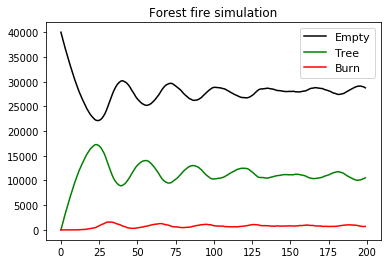

In [5]:
maskTre= sim % 2 ==0 # Creating a mask for trees

# Getting count of of each in data frame for plotting
Toplot= pd.DataFrame({'Empty': np.count_nonzero(sim==0, axis=(1,2)),
                      'Tree': np.sum(ma.masked_array(sim, maskTre), axis=(1,2)),
                      'Burn' : np.sum(ma.masked_array(sim, ~maskTre), axis=(1,2))/2}).replace(np.nan, 0)

# Making the plot
plt.plot(Toplot['Empty'], label= "Empty", color='black')
plt.plot(Toplot['Tree'], label= "Tree", color='g')
plt.plot(Toplot['Burn'], label= "Burn", color='r')
plt.legend(loc='best', fontsize=11)
plt.title('Forest fire simulation')
plt.show()

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [6]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [7]:
%%time

HTML(ani.to_jshtml())

Wall time: 12.1 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```

In [ ]:
# The above code was not working despite having ffmpeg installed